In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


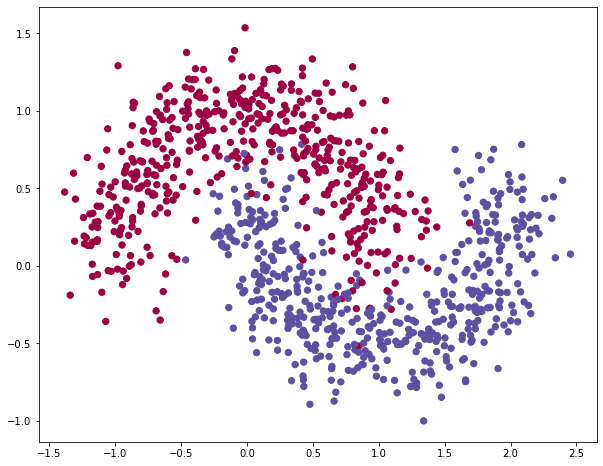

In [14]:
# Generate a dataset and plot it 
np.random.seed(0) 
X, y = sklearn.datasets.make_moons(1000, noise=0.20) 
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral) 


a) (10 points) Add the required Python lines to the existing code to create a Confusion Matrix for the  Logistic Regression result from the scikit-learn library. First produce 500 blue samples and 500 red  samples and later find the classification performance from these test dataset. Produce nn-from scratch-confusion.ipynb file.  

In [15]:
# Train the logistic regression classifier
lr = sklearn.linear_model.LogisticRegressionCV()
lr.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [16]:
y_pred = lr.predict(X)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[436,  64],
       [ 70, 430]])

In [18]:
tn, fp, fn, tp  = confusion_matrix(y, y_pred).ravel()
tn, fp, fn, tp 

(436, 64, 70, 430)

b) (5 points) Explain the Confusion Matrix output in your modified Jupyter notebook and also in your  report. Briefly describe 4 numbers in the matrix and also accuracy, precision and recall values. 

Confusin matrix explains that how much did correctly.
True Positive = 123 
False Positive = 30
False Negative = 29
True Negative = 148
True values are bigger than others.So this is good.

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.866

Out of all the classes, how much we predicted correctly, which will be, in this case 0.82. It should be high as possible.

In [20]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, y_pred)

In [21]:
precision

array([0.5       , 0.87044534, 1.        ])

Out of all the positive classes we have predicted correctly, how many are actually positive. Values are good

In [22]:
recall

array([1.  , 0.86, 0.  ])

Out of all the positive classes, how much we predicted correctly. It should be high as possible. 0.83615819 is not bad.

In [23]:
thresholds

array([0, 1])

In [24]:

# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

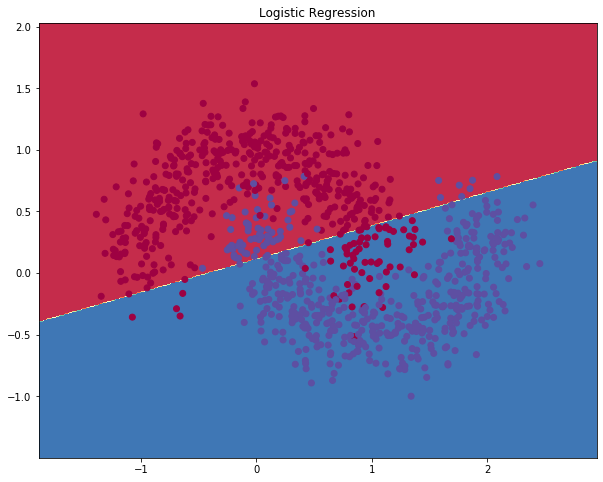

In [25]:
# Plot the decision boundary
plot_decision_boundary(lambda x: lr.predict(x))
plt.title("Logistic Regression")


c) (5 points) Put the output plot (decision boundary learned) obtained by Logistic Regression into your  report and interpret the output. Is the classification is good enough to separate red and blue  classes? Why, explain your answer. 


Separated by a single line. I think this is not enough.Because separator couldnt separate completely or near completely. There are still many blue members above the line and of course there are red members under it.But pay attention to underfit. This model is not ready right now.

In [26]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [27]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [28]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [29]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.392567
Loss after iteration 1000: 1.215343
Loss after iteration 2000: 0.919920
Loss after iteration 3000: 0.659220
Loss after iteration 4000: 0.814585
Loss after iteration 5000: 0.636209
Loss after iteration 6000: 0.633091
Loss after iteration 7000: 1.401825
Loss after iteration 8000: 0.799639
Loss after iteration 9000: 0.483043
Loss after iteration 10000: 0.639655
Loss after iteration 11000: 0.609930
Loss after iteration 12000: 0.900193
Loss after iteration 13000: 0.524556
Loss after iteration 14000: 0.474778
Loss after iteration 15000: 0.575750
Loss after iteration 16000: 1.039465
Loss after iteration 17000: 0.594432
Loss after iteration 18000: 0.722006
Loss after iteration 19000: 0.963838


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

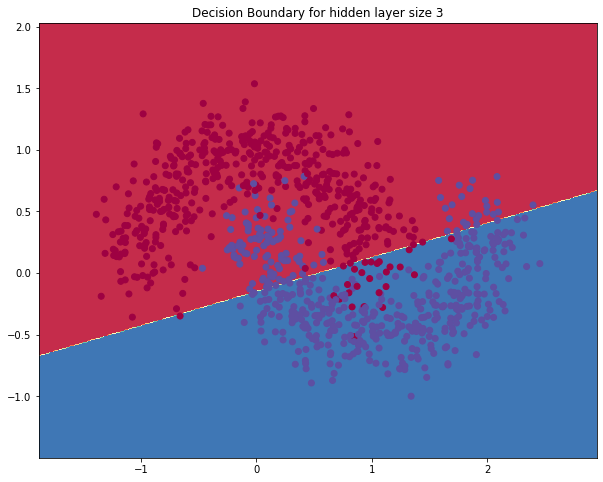

In [30]:

# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

d) (5 puan) Explain the following methods build_model, calculate_loss ve predict and also  important variables of the program (such as gradient descent parameters, epsilon, reg_lamda.) 

In build model method,while we are building model,we are calculating required mathmatical processes.

In calculate_loss while we are building our model,we are changing loss data with calculated true one. We are calculating true one as some mathmatical processes. We return the highest probability.

In the predict, we make a prediction process as it is cleared of bad data and arranged.here we train our Neural Network. It implements batch gradient descent using the backpropagation derivates we found above.

num_examples => training set size ,
nn_input_dim => input layer dimensionality ,
nn_output_dim => output layer dimensionality and Gradient descent parameters ,
epsilon => learning rate for gradient descent ,
reg_lambda => regularization strength

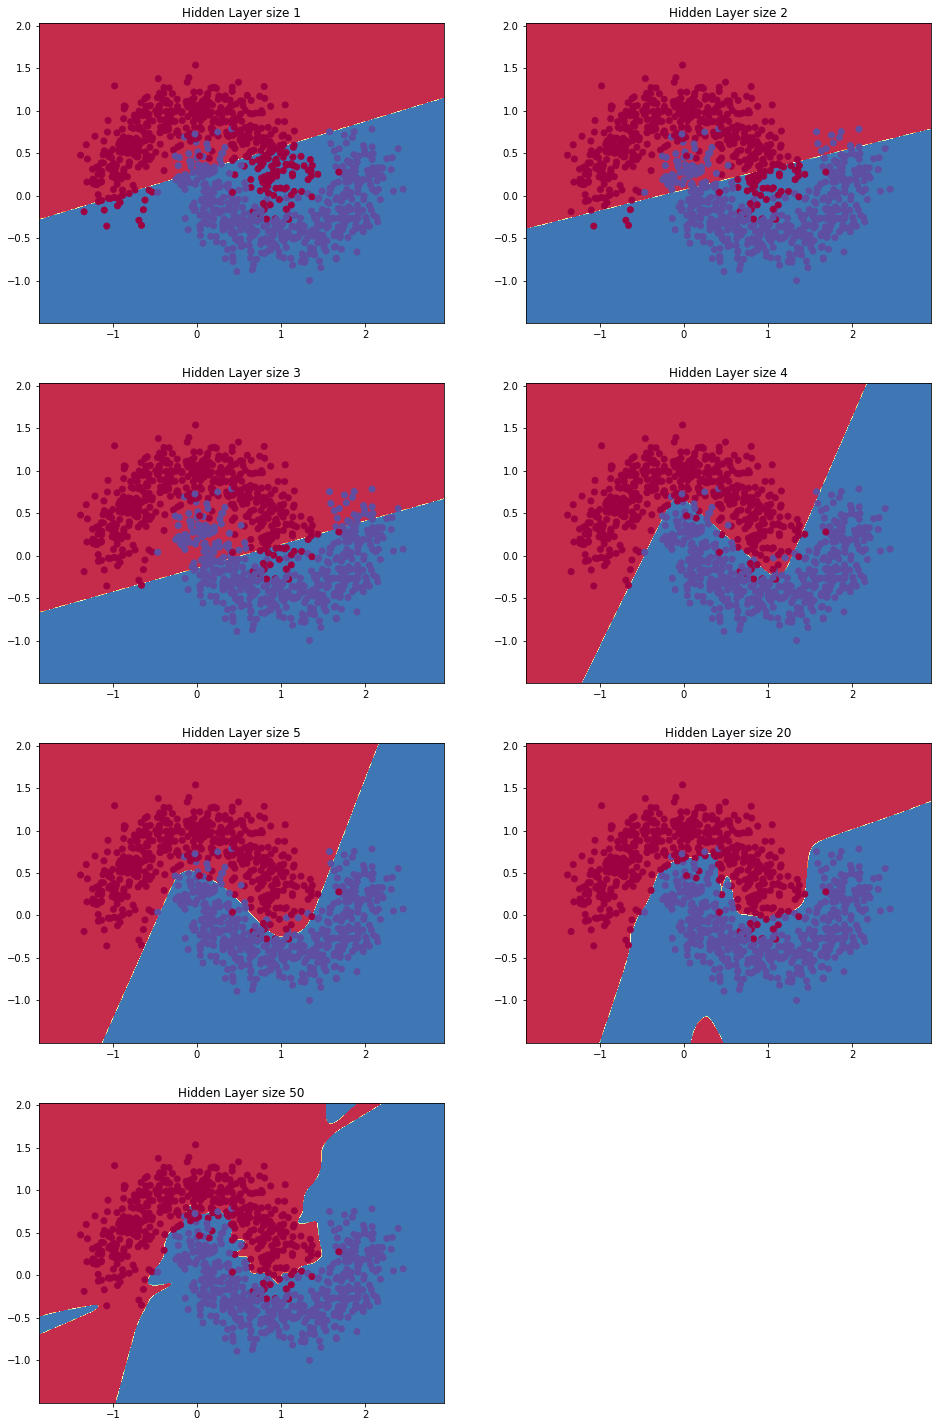

In [31]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50].
Hidden layer dimensions are a term we use to make the model fit better.

In neural networks, a hidden layer is located between the input and output of the algorithm, in which the function applies weights to the inputs and directs them through an activation function as the output. In short, the hidden layers perform nonlinear transformations of the inputs entered into the network.

Hidden layer number =1: not well separated - underfit
Hidden layer number =2: not well separated - underfit
Hidden layer number =3: not well separated - underfit
Hidden layer number =4: not well separated - underfit
Hidden layer number =5: not well separated - underfit
Hidden layer number =20: well separated - fit
Hidden layer number =50: overfit

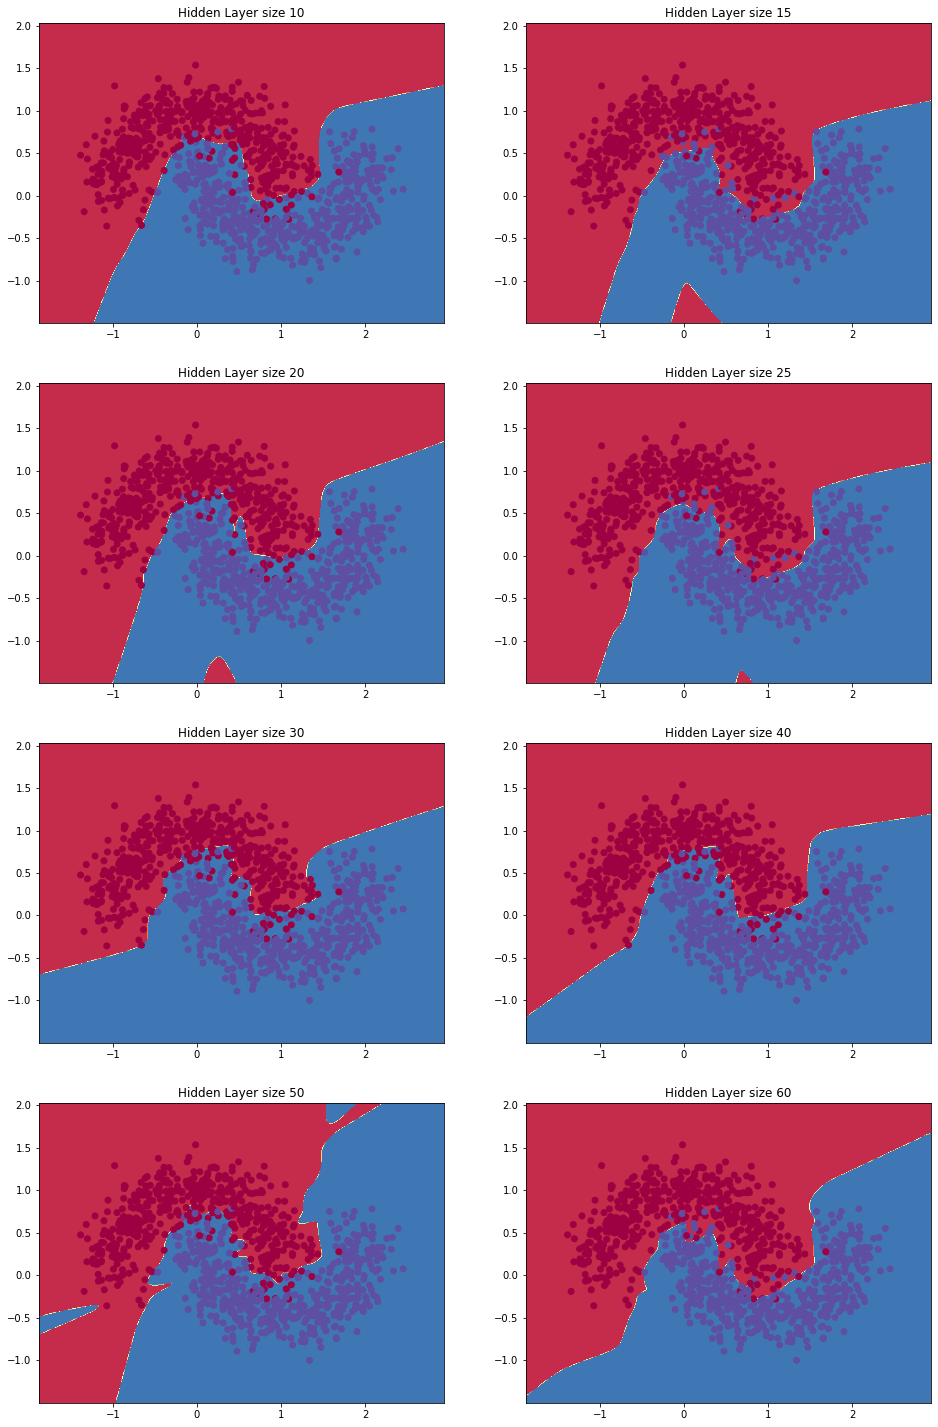

In [33]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [10,15,20,25,30,40,50,60]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

e) (5 puan) Explain this line: hidden_layer_dimensions = [10,15,20,25,30,40,50,60]. 

Hidden layer number =10: not well separated - underfit ,
Hidden layer number =15: not well separated - underfit ,
Hidden layer number =20: not well separated - underfit ,
Hidden layer number =25: not well separated - underfit ,
Hidden layer number =30: almost overfit
Hidden layer number =40: overfit ,
Hidden layer number =50: overfit ,
Hidden layer number =60: overfit

f) (5 puan) How is regularization performed in the program? 

Regularization increases loss when misguided. The main purpose of the model is to minimize loss and optimize the data better. I mean regularization effects well.

g) (5 puan) What happens as the number of hidden layers is increased in the program output? Is this  good or bad for binary classification? What is its relation to overfitting? Explain these questions by  putting printouts in your report. 

As the number of hidden layers increases, the number of weights and bias that need to be updated also increases. Therefore, these values will be affected by ragularization and the effect of regularization will increase with the increase of the number of hidden layers. It will increase the performance of the data until a certain number of hidden layers. Good for this model. But after a point, it will cause overfit. Performance will also negatively affect.

You can't see an overfit plot that repeats itself until the 30th layer. But after 30 it starts to repeat itself, that is to memorize it. We call this event overfit. It is something we do not want. And for this model, the number of hidden layers should be maximum 30.

k) (optional for extra credit) Extend the network to 4 layers. Experiment with the layer size. Adding
another hidden layer means you will need to adjust both the forward propagation as well as the
backpropagation code.

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


In [35]:

from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=4, n_features=2)
# scatter plot, dots colored by class value


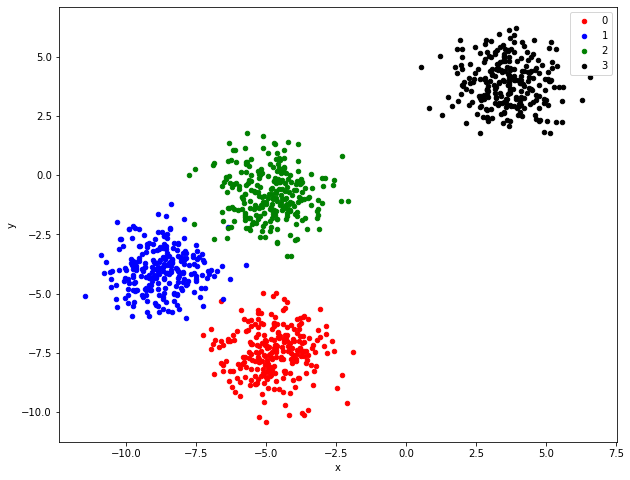

In [36]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green',3:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [37]:
# Train the logistic regression classifier
lr = sklearn.linear_model.LogisticRegressionCV()
lr.fit(X, y)

/Users/mehmeteraysurmeli/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mehmeteraysurmeli/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [38]:
y_pred = lr.predict(X)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[249,   1,   0,   0],
       [  0, 248,   2,   0],
       [  0,   2, 248,   0],
       [  0,   0,   0, 250]])

In [40]:
confusion_matrix(y, y_pred).ravel()

array([249,   1,   0,   0,   0, 248,   2,   0,   0,   2, 248,   0,   0,
         0,   0, 250])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.995

Text(0.5, 1.0, 'Logistic Regression')

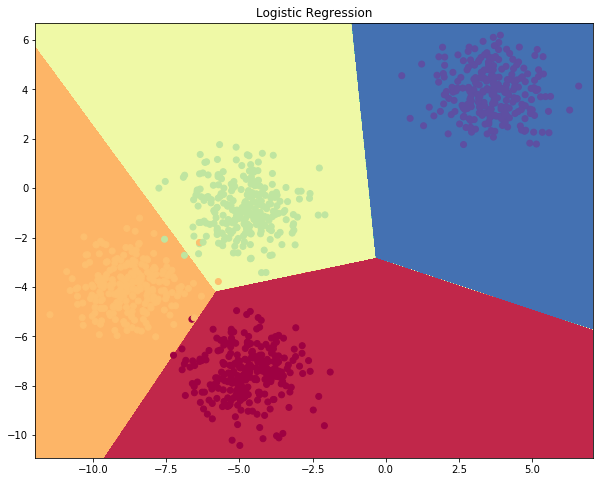

In [42]:
# Plot the decision boundary
plot_decision_boundary(lambda x: lr.predict(x))
plt.title("Logistic Regression")
